In [194]:
import pandas as pd
import numpy as np
from datetime import datetime
import gc

In [195]:
def read_finam_csv(filename):
    
    df = pd.read_csv(filename, sep=',', header=0, engine='python', 
                     usecols=['<TICKER>', '<DATE>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>'],
                     dtype={
                         '<TICKER>': str,
                         '<OPEN>': np.float,
                         '<HIGH>': np.float,
                         '<LOW>': np.float,
                         '<CLOSE>': np.float,
                         '<VOL>': np.float
                     },
                     parse_dates=['<DATE>'],
                     date_parser=lambda x: datetime.strptime(x, '%Y%m%d')
                    )

    df.rename(columns=dict([(c,c.replace('<','').replace('>','').lower()) for c in df.columns]), inplace=True) # remove '<','>' from column names
    
    return df


def pivot_history_df(data, date_cols, ticker_cols, value_col):
    
    return data.pivot(index=date_cols, columns=ticker_cols, values=value_col)


# collect data to DataFrame

In [196]:
from os import listdir
from os.path import isfile, join

datadir = r'data1/'

exclude = ['stock-index-base-moex10-201217.xlsx',
           'stock-index-base-moex-rts-18122012-nowadays.xlsx',
           'MOEX10_050101_210131.csv'
          ]

datafiles = [join(datadir, f) for f in listdir(datadir) if isfile(join(datadir, f)) and f not in exclude]

res = None

for filename in datafiles:
    if '.DS_Store' not in filename:
        print(filename)

        df = read_finam_csv(filename)

        res = df if res is None else res.append(df)

res.head()

data1/AFLT_050101_210131.csv
data1/comex.GC_050101_210131.csv
data1/GAZP_050101_210131.csv
data1/GMKN_050101_210131.csv
data1/ICEBRN_050101_210131.csv
data1/LKOH_050101_210131.csv
data1/PLZL_050101_210131.csv
data1/POLY_050101_210131.csv
data1/RTSI_050101_210131.csv
data1/SBERP_050101_210131.csv
data1/SBER_050101_210131.csv
data1/TATN_050101_210131.csv
data1/USD000000TOD_050101_210131.csv
data1/USDRUB_050101_210131.csv
data1/YNDX_050101_210131.csv


,ticker,date,open,high,low,close,vol
0,AFLT,2005-01-11,35.00,35.00,34.30,34.35,50139.0
1,AFLT,2005-01-12,34.35,34.75,32.57,33.81,72781.0
2,AFLT,2005-01-13,32.81,34.20,31.51,34.10,46226.0
3,AFLT,2005-01-14,34.20,34.80,34.00,34.22,41555.0
4,AFLT,2005-01-17,34.22,34.70,34.00,34.01,38009.0


In [197]:
import pickle

# save DataFrame to binary file
with open(r'data2\chebysh_data.pickle', 'wb') as f:
    pickle.dump(res, f)

In [198]:
import pickle

# load DataFrame from binary file
with open(r'data2\chebysh_data.pickle', 'rb') as f:
    res = pickle.load(f)

In [199]:
price_df = pivot_history_df(res, date_cols='date', ticker_cols='ticker', value_col='close')

portfolio_assets = ['AFLT', 'GAZP', 'GMKN', 'LKOH', 'PLZL', 'POLY', 'SBER', 'SBERP', 'YNDX']
date_start = pd.datetime(2014, 6, 4)
date_end   = pd.datetime(2020, 12, 31)

price_df = price_df.loc[date_start:date_end][[c for c in price_df.columns if c in portfolio_assets]]\
            .dropna(how='all')\
            .sort_index()

price_df.head()

<ipython-input-199-32bb31bce170>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date_start = pd.datetime(2014, 6, 4)
<ipython-input-199-32bb31bce170>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date_end   = pd.datetime(2020, 12, 31)


ticker,AFLT,GAZP,GMKN,LKOH,PLZL,POLY,SBER,SBERP,YNDX
date,,,,,,,,,
2014-06-04,57.20,144.04,6898.0,2047.0,517.0,309.03,87.81,71.91,1170.0
2014-06-05,57.57,142.75,6882.0,2035.0,513.1,306.78,87.43,72.10,1145.1
2014-06-06,57.59,143.97,6975.0,2030.6,513.7,315.33,89.00,72.89,1163.0
2014-06-09,58.84,144.40,7029.0,2025.0,511.6,314.79,88.89,73.40,1172.1
2014-06-10,58.85,144.75,6900.0,2061.4,507.0,316.49,88.99,73.33,1170.0


In [200]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1657 entries, 2014-06-04 to 2020-12-30
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AFLT    1657 non-null   float64
 1   GAZP    1657 non-null   float64
 2   GMKN    1657 non-null   float64
 3   LKOH    1657 non-null   float64
 4   PLZL    1657 non-null   float64
 5   POLY    1650 non-null   float64
 6   SBER    1657 non-null   float64
 7   SBERP   1657 non-null   float64
 8   YNDX    1657 non-null   float64
dtypes: float64(9)
memory usage: 129.5 KB


In [201]:
return_df = (price_df.diff() / price_df).dropna(how='any')



ticker,AFLT,GAZP,GMKN,LKOH,PLZL,POLY,SBER,SBERP,YNDX
date,,,,,,,,,
2014-06-05,0.006427,-0.009037,-0.002325,-0.005897,-0.007601,-0.007334,-0.004346,0.002635,-0.021745
2014-06-06,0.000347,0.008474,0.013333,-0.002167,0.001168,0.027114,0.017640,0.010838,0.015391
2014-06-09,0.021244,0.002978,0.007682,-0.002765,-0.004105,-0.001715,-0.001237,0.006948,0.007764
2014-06-10,0.000170,0.002418,-0.018696,0.017658,-0.009073,0.005371,0.001124,-0.000955,-0.001795
2014-06-11,-0.001873,0.011270,0.005764,0.017398,0.011310,-0.006040,0.000112,0.004885,0.008391


In [323]:
try:
    return_df.loc['2017-01-07']
except  KeyError:
    pass
    print("KeyError")

KeyError


In [263]:
import calendar
# 2017.01.03 - 2019.12.31 
cl = calendar.Calendar()
# cl.yeardatescalendar(2017)[0][0]
import datetime as DT
import pandas as pd

start_date = pd.datetime(2017, 1, 3)
end_date = pd.datetime(2019, 12, 31)

res = pd.date_range(
    min(start_date, end_date),
    max(start_date, end_date)
).strftime('%Y-%m-%d').tolist()

res


<ipython-input-263-8cf1cd743b05>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_date = pd.datetime(2017, 1, 3)
<ipython-input-263-8cf1cd743b05>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  end_date = pd.datetime(2019, 12, 31)


['2017-01-03',
 '2017-01-04',
 '2017-01-05',
 '2017-01-06',
 '2017-01-07',
 '2017-01-08',
 '2017-01-09',
 '2017-01-10',
 '2017-01-11',
 '2017-01-12',
 '2017-01-13',
 '2017-01-14',
 '2017-01-15',
 '2017-01-16',
 '2017-01-17',
 '2017-01-18',
 '2017-01-19',
 '2017-01-20',
 '2017-01-21',
 '2017-01-22',
 '2017-01-23',
 '2017-01-24',
 '2017-01-25',
 '2017-01-26',
 '2017-01-27',
 '2017-01-28',
 '2017-01-29',
 '2017-01-30',
 '2017-01-31',
 '2017-02-01',
 '2017-02-02',
 '2017-02-03',
 '2017-02-04',
 '2017-02-05',
 '2017-02-06',
 '2017-02-07',
 '2017-02-08',
 '2017-02-09',
 '2017-02-10',
 '2017-02-11',
 '2017-02-12',
 '2017-02-13',
 '2017-02-14',
 '2017-02-15',
 '2017-02-16',
 '2017-02-17',
 '2017-02-18',
 '2017-02-19',
 '2017-02-20',
 '2017-02-21',
 '2017-02-22',
 '2017-02-23',
 '2017-02-24',
 '2017-02-25',
 '2017-02-26',
 '2017-02-27',
 '2017-02-28',
 '2017-03-01',
 '2017-03-02',
 '2017-03-03',
 '2017-03-04',
 '2017-03-05',
 '2017-03-06',
 '2017-03-07',
 '2017-03-08',
 '2017-03-09',
 '2017-03-

# data exploration

In [203]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import matplotlib.pyplot as plt
import seaborn as sns

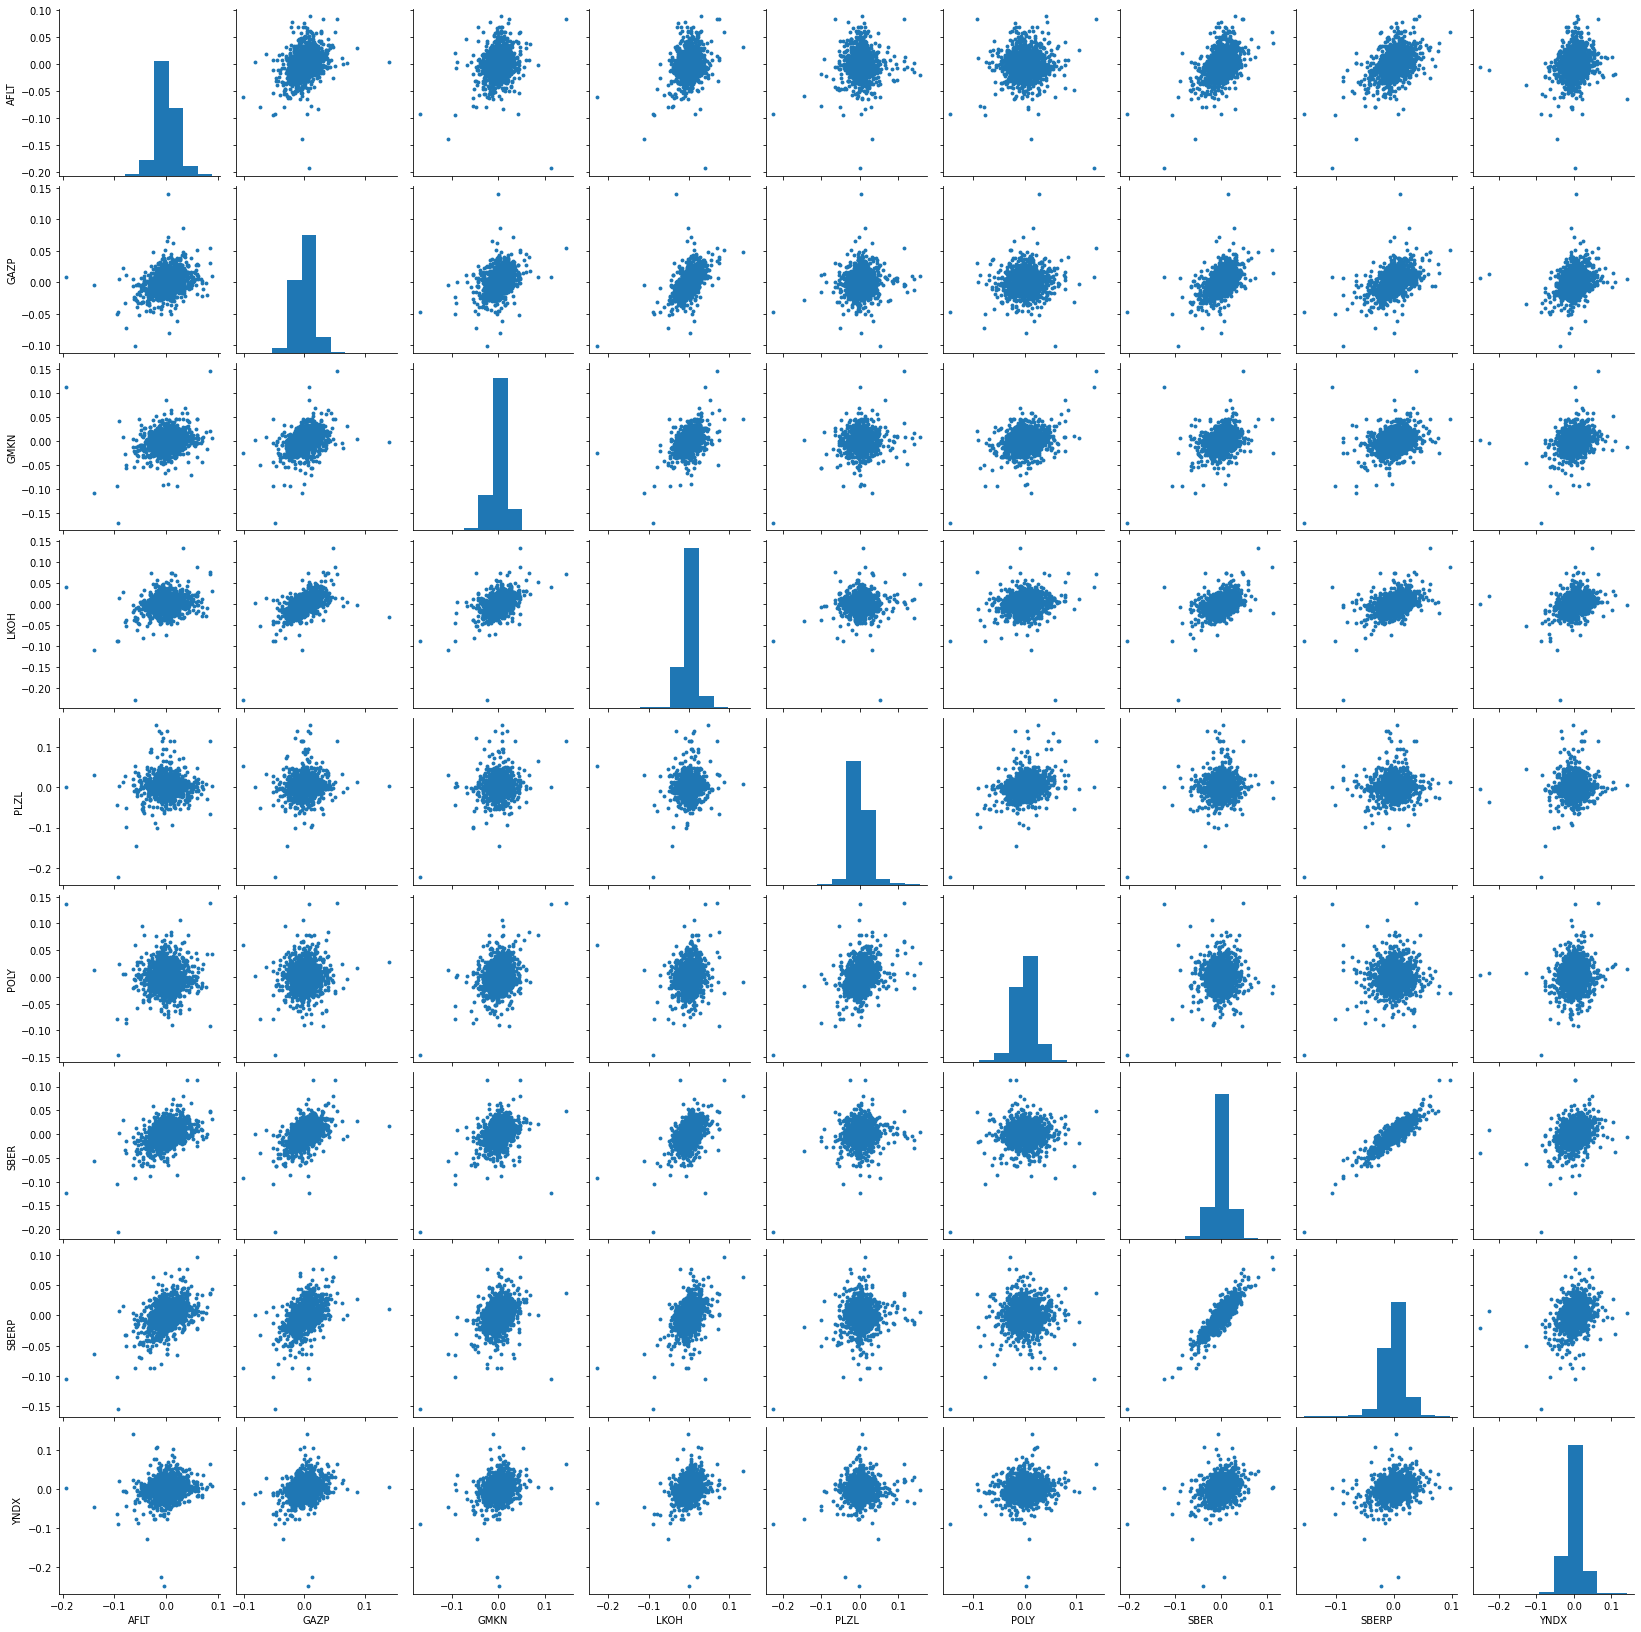

In [204]:
sns.pairplot(data=return_df, diag_kind='hist', plot_kws=dict(marker="o", s=15, linewidth=0))

In [289]:
from scipy import optimize


def get_minmax_range(x, q = 0.0):
    
    return (np.percentile(x, 100*0.5*q), np.percentile(x, 100*(1-0.5*q)))


def var_empir(losses, alpha):

    return np.percentile(losses, 100 - 100*alpha)


def cvar_empir(losses, alpha):

    f = lambda v: v + np.mean(np.maximum(losses-v, 0)) / alpha
    v0 = var_empir(losses, alpha)
    
    return optimize.minimize(f, v0).x[0]


def brown_ubound_eps(x, alpha, conf_level, q=0.0):
    
    if q >= conf_level:
        raise Exception('Cannot attain confidence less than q')
    
    a, b = get_minmax_range(x, q=q)
    N = x.shape[0]
    
    return (b-a) * np.sqrt(-0.5 * np.log(conf_level-q) / N) / alpha


def brown_lbound_eps(x, alpha, conf_level, q=0.0):
    
    if q >= conf_level:
        raise Exception('Cannot attain confidence less than q')
    
    a, b = get_minmax_range(x, q=q)
    N = x.shape[0]
    
    return (b-a) * np.sqrt(-5 * np.log((conf_level-q)/float(3)) / alpha / N)

In [266]:
from sklearn.utils import check_random_state
from datetime import timedelta

seed = 0
random_state = check_random_state(seed)
depth = 2*365
q = 0.02
cvar_alpha = 0.05
conf_level = 0.97


In [340]:
w = np.ones(return_df.shape[1], dtype=np.float) / return_df.shape[1]
from scipy.optimize import minimize 

def Brown_opt(q_opt): 
    cvar_alpha = 0.05 
    conf_level = 0.97
    return 100 * (cvar_empir(V,  cvar_alpha) + brown_lbound_eps(V, cvar_alpha, 1-conf_level, q=q_opt))

import datetime as DT
import pandas as pd

start_date = pd.datetime(2017, 1, 3)
end_date = pd.datetime(2019, 12, 31)

res = pd.date_range(
    min(start_date, end_date),
    max(start_date, end_date)
).strftime('%Y-%m-%d').tolist()

var_empir_list= []
cvar_empir_list = []
brown_lbound_eps_list = []
Brown_opt_list = []
min_q_list= []
V_list = []
data_list = []
for data_start in res:
    try:
        return_df.loc[data_start]
        data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))
        print(data_start)
        data_list.append(data_start)
        V = -return_df.loc[data_start - timedelta(depth) : data_start].values @ w
        V_list.append(V)
    #     print(data_start)

        var = 100 * var_empir(V, cvar_alpha)
    #     print('VaR est = {0:.4f}%'.format(var))
        var_empir_list.append(var)

        cvar = 100 * cvar_empir(V, cvar_alpha)
    #     print('CVaR est = {0:.4f}%'.format(cvar))
        cvar_empir_list.append(cvar)

        brown = 100 * (cvar_empir(V, cvar_alpha) + brown_lbound_eps(V, cvar_alpha, 1-conf_level, q=q))
        brown_lbound_eps_list.append(brown)
    #     print('(Brown) CVaR < {0:.4f}% with confidence {1:.2f}%'.format(brown , 100 * conf_level))    

        min_Brown_opt = minimize(Brown_opt, q, method='Nelder-Mead', tol=1e-8,options={'disp': True,}) 
    #     print(min_Brown_opt)
        min_q = min_Brown_opt.x 
    #     print(min_q, 'min_q')
        min_Brown_opt_value = min_Brown_opt.fun 
    #     print(min_Brown_opt_value, 'min_Brown_opt_value')

        Brown_opt_list.append(min_Brown_opt_value)
        min_q_list.append(min_q)
    except  KeyError:
        pass
        print("KeyError")
   

<ipython-input-340-49673561ce99>:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_date = pd.datetime(2017, 1, 3)
<ipython-input-340-49673561ce99>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  end_date = pd.datetime(2019, 12, 31)
<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


2017-01-03 00:00:00
Optimization terminated successfully.
         Current function value: 7.610451
         Iterations: 22
         Function evaluations: 44
2017-01-04 00:00:00
Optimization terminated successfully.
         Current function value: 7.602313
         Iterations: 24
         Function evaluations: 48
2017-01-05 00:00:00
Optimization terminated successfully.
         Current function value: 7.419546
         Iterations: 23
         Function evaluations: 46
2017-01-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.394714
         Iterations: 20
         Function evaluations: 40
KeyError
KeyError
2017-01-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.317276
         Iterations: 22
         Function evaluations: 44
2017-01-10 00:00:00
Optimization terminated successfully.
         Current function value: 7.309535
         Iterations: 20
         Function evaluations: 40
2017-01-11 00:00:00
Optimization terminated successfully.
         Current function value: 7.293191
         Iterations: 22
         Function evaluations: 44
2017-01-12 00:00:00
Optimization terminated successfully.
         Current function value: 7.293191
         Iterations: 22
         Function evaluations: 44
2017-01-13 00:00:00
Optimization terminated successfully.
         Current function value: 7.293191
         Iterations: 22
         Function evaluations: 44
KeyError
KeyError
2017-01-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.309544
         Iterations: 22
         Function evaluations: 44
2017-01-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.301349
         Iterations: 20
         Function evaluations: 40
2017-01-18 00:00:00
Optimization terminated successfully.
         Current function value: 7.293191
         Iterations: 22
         Function evaluations: 44
2017-01-19 00:00:00
Optimization terminated successfully.
         Current function value: 7.293191
         Iterations: 22
         Function evaluations: 44
2017-01-20 00:00:00
Optimization terminated successfully.
         Current function value: 7.293191
         Iterations: 22
         Function evaluations: 44
KeyError
KeyError
2017-01-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.317276
         Iterations: 22
         Function evaluations: 44
2017-01-24 00:00:00
Optimization terminated successfully.
         Current function value: 7.301349
         Iterations: 20
         Function evaluations: 40
2017-01-25 00:00:00
Optimization terminated successfully.
         Current function value: 7.293191
         Iterations: 22
         Function evaluations: 44
2017-01-26 00:00:00
Optimization terminated successfully.
         Current function value: 7.235635
         Iterations: 22
         Function evaluations: 44
2017-01-27 00:00:00
Optimization terminated successfully.
         Current function value: 7.235635
         Iterations: 22
         Function evaluations: 44
KeyError
KeyError
2017-01-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.308178
         Iterations: 22
         Function evaluations: 44
2017-01-31 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.300438
         Iterations: 20
         Function evaluations: 40
2017-02-01 00:00:00
Optimization terminated successfully.
         Current function value: 7.235635
         Iterations: 22
         Function evaluations: 44
2017-02-02 00:00:00
Optimization terminated successfully.
         Current function value: 7.219731
         Iterations: 22
         Function evaluations: 44
2017-02-03 00:00:00
Optimization terminated successfully.
         Current function value: 7.219731
         Iterations: 22
         Function evaluations: 44
KeyError
KeyError
2017-02-06 00:00:00
Optimization terminated successfully.
         Current function value: 7.248071
         Iterations: 22
         Function evaluations: 44
2017-02-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.228113
         Iterations: 20
         Function evaluations: 40
2017-02-08 00:00:00
Optimization terminated successfully.
         Current function value: 7.219731
         Iterations: 22
         Function evaluations: 44
2017-02-09 00:00:00
Optimization terminated successfully.
         Current function value: 7.219731
         Iterations: 22
         Function evaluations: 44
2017-02-10 00:00:00
Optimization terminated successfully.
         Current function value: 7.219731
         Iterations: 22
         Function evaluations: 44
KeyError
KeyError
2017-02-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.248071
         Iterations: 22
         Function evaluations: 44
2017-02-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.228113
         Iterations: 20
         Function evaluations: 40
2017-02-15 00:00:00
Optimization terminated successfully.
         Current function value: 7.219731
         Iterations: 22
         Function evaluations: 44
2017-02-16 00:00:00
Optimization terminated successfully.
         Current function value: 7.219731
         Iterations: 22
         Function evaluations: 44
2017-02-17 00:00:00
Optimization terminated successfully.
         Current function value: 7.219731
         Iterations: 22
         Function evaluations: 44
KeyError
KeyError
2017-02-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.248071
         Iterations: 22
         Function evaluations: 44
2017-02-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.240331
         Iterations: 20
         Function evaluations: 40
2017-02-22 00:00:00
Optimization terminated successfully.
         Current function value: 7.219731
         Iterations: 22
         Function evaluations: 44
KeyError
2017-02-24 00:00:00
Optimization terminated successfully.
         Current function value: 7.219731
         Iterations: 22
         Function evaluations: 44
KeyError
KeyError
2017-02-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.308178
         Iterations: 22
         Function evaluations: 44
2017-02-28 00:00:00
Optimization terminated successfully.
         Current function value: 7.300438
         Iterations: 20
         Function evaluations: 40
2017-03-01 00:00:00
Optimization terminated successfully.
         Current function value: 7.235635
         Iterations: 22
         Function evaluations: 44
2017-03-02 00:00:00
Optimization terminated successfully.
         Current function value: 7.235635
         Iterations: 22
         Function evaluations: 44
2017-03-03 00:00:00
Optimization terminated successfully.
         Current function value: 7.235635
         Iterations: 22
         Function evaluations: 44
KeyError
KeyError
2017-03-06 00:00:00
Optimization terminated successfully.
         Current function value: 7.225691
         Iterations: 22
         Function evaluations: 44
2017-03-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.217433
         Iterations: 20
         Function evaluations: 40
KeyError
2017-03-09 00:00:00
Optimization terminated successfully.
         Current function value: 7.219731
         Iterations: 22
         Function evaluations: 44
2017-03-10 00:00:00
Optimization terminated successfully.
         Current function value: 7.120902
         Iterations: 26
         Function evaluations: 52
KeyError
KeyError
2017-03-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.159497
         Iterations: 20
         Function evaluations: 41
2017-03-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.169880
         Iterations: 21
         Function evaluations: 43
2017-03-15 00:00:00
Optimization terminated successfully.
         Current function value: 7.136386
         Iterations: 21
         Function evaluations: 43
2017-03-16 00:00:00
Optimization terminated successfully.
         Current function value: 7.117972
         Iterations: 21
         Function evaluations: 43
2017-03-17 00:00:00
Optimization terminated successfully.
         Current function value: 7.117972
         Iterations: 21
         Function evaluations: 43
KeyError
KeyError
2017-03-20 00:00:00
Optimization terminated successfully.
         Current function value: 7.155848
         Iterations: 20
         Function evaluations: 41
2017-03-21 00:00:00
Optimization terminated successfully.
         Current function value: 7.129268
         Iterations: 21
         Function evaluations: 43
2017-03-22 00:00:00
Optimization terminated successful

<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.116425
         Iterations: 20
         Function evaluations: 41
2017-03-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.104883
         Iterations: 21
         Function evaluations: 43
2017-03-29 00:00:00
Optimization terminated successfully.
         Current function value: 7.093237
         Iterations: 21
         Function evaluations: 43
2017-03-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.093237
         Iterations: 21
         Function evaluations: 43
2017-03-31 00:00:00
Optimization terminated successfully.
         Current function value: 7.093237
         Iterations: 21
         Function evaluations: 43
KeyError
KeyError
2017-04-03 00:00:00
Optimization terminated successfully.
         Current function value: 7.137745
         Iterations: 20
         Function evaluations: 41
2017-04-04 00:00:00
Optimization terminated successfully.
         Current function value: 7.104883
         Iterations: 21
         Function evaluations: 43
2017-04-05 00:00:00
Optimization terminated successfully.
         Current function value: 7.093237
         Iterations: 21
         Function evaluations: 43
2017-04-06 00:00:00
Optimization terminated successfully.
         Current function value: 7.093237
         Iterations: 21
         Function evaluations: 43
2017-04-07 00:00:00
Optimization terminated successful

<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.155848
         Iterations: 20
         Function evaluations: 41
2017-04-11 00:00:00
Optimization terminated successfully.
         Current function value: 7.140100
         Iterations: 21
         Function evaluations: 43
2017-04-12 00:00:00
Optimization terminated successfully.
         Current function value: 7.129406
         Iterations: 21
         Function evaluations: 43
2017-04-13 00:00:00
Optimization terminated successfully.
         Current function value: 7.129406
         Iterations: 21
         Function evaluations: 43
2017-04-14 00:00:00
Optimization terminated successfully.
         Current function value: 7.129406
         Iterations: 21
         Function evaluations: 43
KeyError
KeyError
2017-04-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.046766
         Iterations: 23
         Function evaluations: 46
2017-04-18 00:00:00
Optimization terminated successfully.
         Current function value: 7.039984
         Iterations: 22
         Function evaluations: 44
2017-04-19 00:00:00
Optimization terminated successfully.
         Current function value: 7.029619
         Iterations: 22
         Function evaluations: 44
2017-04-20 00:00:00
Optimization terminated successfully.
         Current function value: 7.029619
         Iterations: 22
         Function evaluations: 44
2017-04-21 00:00:00
Optimization terminated successfully.
         Current function value: 7.029619
         Iterations: 22
         Function evaluations: 44
KeyError
KeyError
2017-04-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.050415
         Iterations: 23
         Function evaluations: 46
2017-04-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.061871
         Iterations: 22
         Function evaluations: 44
2017-04-26 00:00:00
Optimization terminated successfully.
         Current function value: 7.029619
         Iterations: 22
         Function evaluations: 44
2017-04-27 00:00:00
Optimization terminated successfully.
         Current function value: 7.019319
         Iterations: 22
         Function evaluations: 44
2017-04-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.010299
         Iterations: 22
         Function evaluations: 44
KeyError
KeyError
KeyError
2017-05-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.001341
         Iterations: 21
         Function evaluations: 42
2017-05-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.992446
         Iterations: 21
         Function evaluations: 42
2017-05-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.983611
         Iterations: 24
         Function evaluations: 48
2017-05-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.974836
         Iterations: 22
         Function evaluations: 44
KeyError
KeyError
KeyError
KeyError
2017-05-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.986378
         Iterations: 21
         Function evaluations: 42
2017-05-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
2017-05-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-05-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.995273
         Iterations: 21
         Function evaluations: 42
2017-05-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.986378
         Iterations: 21
         Function evaluations: 42
2017-05-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
2017-05-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
2017-05-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-05-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.995273
         Iterations: 21
         Function evaluations: 42
2017-05-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.986378
         Iterations: 21
         Function evaluations: 42
2017-05-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
2017-05-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
2017-05-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-05-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.986569
         Iterations: 21
         Function evaluations: 42
2017-05-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.974343
         Iterations: 21
         Function evaluations: 42
2017-05-31 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
2017-06-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
2017-06-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-06-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.995273
         Iterations: 21
         Function evaluations: 42
2017-06-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.986378
         Iterations: 21
         Function evaluations: 42
2017-06-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
2017-06-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
2017-06-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
KeyError
2017-06-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.992446
         Iterations: 21
         Function evaluations: 42
2017-06-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.983611
         Iterations: 24
         Function evaluations: 48
2017-06-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
2017-06-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007930
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-06-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.025661
         Iterations: 21
         Function evaluations: 42
2017-06-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.016765
         Iterations: 21
         Function evaluations: 42
2017-06-21 00:00:00
Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
2017-06-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007930
         Iterations: 24
         Function evaluations: 48
2017-06-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-06-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.025661
         Iterations: 21
         Function evaluations: 42
2017-06-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.016765
         Iterations: 21
         Function evaluations: 42
2017-06-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007930
         Iterations: 24
         Function evaluations: 48
2017-06-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
2017-06-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007930
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-07-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.025661
         Iterations: 21
         Function evaluations: 42
2017-07-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.016765
         Iterations: 21
         Function evaluations: 42
2017-07-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007930
         Iterations: 24
         Function evaluations: 48
2017-07-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007930
         Iterations: 24
         Function evaluations: 48
2017-07-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-07-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.025661
         Iterations: 21
         Function evaluations: 42
2017-07-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.016765
         Iterations: 21
         Function evaluations: 42
2017-07-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007930
         Iterations: 24
         Function evaluations: 48
2017-07-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
2017-07-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007930
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-07-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.029613
         Iterations: 21
         Function evaluations: 42
2017-07-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.016765
         Iterations: 21
         Function evaluations: 42
2017-07-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007930
         Iterations: 24
         Function evaluations: 48
2017-07-20 00:00:00
Optimization terminated successfully.
         Current function value: 7.007930
         Iterations: 24
         Function evaluations: 48
2017-07-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007930
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-07-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.001341
         Iterations: 21
         Function evaluations: 42
2017-07-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.992445
         Iterations: 21
         Function evaluations: 42
2017-07-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.983611
         Iterations: 24
         Function evaluations: 48
2017-07-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.983611
         Iterations: 24
         Function evaluations: 48
2017-07-28 00:00:00
Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-07-31 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.025661
         Iterations: 21
         Function evaluations: 42
2017-08-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.016765
         Iterations: 21
         Function evaluations: 42
2017-08-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
2017-08-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
2017-08-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-08-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.025661
         Iterations: 21
         Function evaluations: 42
2017-08-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.016765
         Iterations: 21
         Function evaluations: 42
2017-08-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
2017-08-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
2017-08-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-08-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.025661
         Iterations: 21
         Function evaluations: 42
2017-08-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.016765
         Iterations: 21
         Function evaluations: 42
2017-08-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
2017-08-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
2017-08-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-08-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.025661
         Iterations: 21
         Function evaluations: 42
2017-08-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.016765
         Iterations: 21
         Function evaluations: 42
2017-08-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.007931
         Iterations: 24
         Function evaluations: 48
2017-08-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.983610
         Iterations: 24
         Function evaluations: 48
2017-08-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.983610
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-08-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 7.001341
         Iterations: 21
         Function evaluations: 42
2017-08-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.992446
         Iterations: 21
         Function evaluations: 42
2017-08-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.983610
         Iterations: 24
         Function evaluations: 48
2017-08-31 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.983610
         Iterations: 24
         Function evaluations: 48
2017-09-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-09-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.995273
         Iterations: 21
         Function evaluations: 42
2017-09-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.986378
         Iterations: 21
         Function evaluations: 42
2017-09-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
2017-09-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
2017-09-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-09-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.995273
         Iterations: 21
         Function evaluations: 42
2017-09-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.986378
         Iterations: 21
         Function evaluations: 42
2017-09-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
2017-09-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
2017-09-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2017-09-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.995273
         Iterations: 21
         Function evaluations: 42
2017-09-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.986378
         Iterations: 21
         Function evaluations: 42
2017-09-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
2017-09-21 00:00:00
Optimization terminated successfully.
         Current function value: 6.977543
         Iterations: 24
         Function evaluations: 48
2017-09-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.717646
         Iterations: 28
         Function evaluations: 56
KeyError
KeyError
2017-09-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.542679
         Iterations: 30
         Function evaluations: 60
2017-09-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.534455
         Iterations: 31
         Function evaluations: 62
2017-09-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.526288
         Iterations: 28
         Function evaluations: 56
2017-09-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.526289
         Iterations: 28
         Function evaluations: 56
2017-09-29 00:00:00
Optimization terminated successfully.
         Current function value: 6.526289
         Iterations: 28
         Function evaluations: 56
KeyError
KeyError
2017-10-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.542679
         Iterations: 30
         Function evaluations: 60
2017-10-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.534455
         Iterations: 31
         Function evaluations: 62
2017-10-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.526289
         Iterations: 28
         Function evaluations: 56
2017-10-05 00:00:00
Optimization terminated successfully.
         Current function value: 6.526289
         Iterations: 28
         Function evaluations: 56
2017-10-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.526289
         Iterations: 28
         Function evaluations: 56
KeyError
KeyError
2017-10-09 00:00:00
Optimization terminated successfully.
         Current function value: 6.491615
         Iterations: 18
         Function evaluations: 36
2017-10-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.484756
         Iterations: 18
         Function evaluations: 36
2017-10-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.477912
         Iterations: 18
         Function evaluations: 36
2017-10-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.477911
         Iterations: 18
         Function evaluations: 36
2017-10-13 00:00:00
Optimization terminated successfully.
         Current function value: 6.477911
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2017-10-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.491616
         Iterations: 18
         Function evaluations: 36
2017-10-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.484756
         Iterations: 18
         Function evaluations: 36
2017-10-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.477911
         Iterations: 18
         Function evaluations: 36
2017-10-19 00:00:00
Optimization terminated successfully.
         Current function value: 6.477911
         Iterations: 18
         Function evaluations: 36
2017-10-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.477911
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2017-10-23 00:00:00
Optimization terminated successfully.
         Current function value: 6.387451
         Iterations: 18
         Function evaluations: 36
2017-10-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.380592
         Iterations: 18
         Function evaluations: 36
2017-10-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.373747
         Iterations: 18
         Function evaluations: 36
2017-10-26 00:00:00
Optimization terminated successfully.
         Current function value: 6.373747
         Iterations: 18
         Function evaluations: 36
2017-10-27 00:00:00
Optimization terminated successfully.
         Current function value: 6.373747
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2017-10-30 00:00:00
Optimization terminated successfully.
         Current function value: 6.387451
         Iterations: 18
         Function evaluations: 36
2017-10-31 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.380592
         Iterations: 18
         Function evaluations: 36
2017-11-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.373747
         Iterations: 18
         Function evaluations: 36
2017-11-02 00:00:00
Optimization terminated successfully.
         Current function value: 6.373747
         Iterations: 18
         Function evaluations: 36
2017-11-03 00:00:00
Optimization terminated successfully.
         Current function value: 6.373748
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
KeyError
2017-11-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.380592
         Iterations: 18
         Function evaluations: 36
2017-11-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.373747
         Iterations: 18
         Function evaluations: 36
2017-11-09 00:00:00
Optimization terminated successfully.
         Current function value: 6.373748
         Iterations: 18
         Function evaluations: 36
2017-11-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.373748
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2017-11-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.387451
         Iterations: 18
         Function evaluations: 36
2017-11-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.380592
         Iterations: 18
         Function evaluations: 36
2017-11-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.373748
         Iterations: 18
         Function evaluations: 36
2017-11-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.373748
         Iterations: 18
         Function evaluations: 36
2017-11-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.352777
         Iterations: 23
         Function evaluations: 46
KeyError
KeyError
2017-11-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.322898
         Iterations: 22
         Function evaluations: 44
2017-11-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.314879
         Iterations: 30
         Function evaluations: 60
2017-11-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.306898
         Iterations: 29
         Function evaluations: 58
2017-11-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.306898
         Iterations: 29
         Function evaluations: 58
2017-11-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.178120
         Iterations: 22
         Function evaluations: 44
KeyError
KeyError
2017-11-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.113048
         Iterations: 24
         Function evaluations: 48
2017-11-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.106568
         Iterations: 24
         Function evaluations: 48
2017-11-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.100119
         Iterations: 22
         Function evaluations: 44
2017-11-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.184117
         Iterations: 22
         Function evaluations: 44
2017-12-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.178120
         Iterations: 22
         Function evaluations: 44
KeyError
KeyError
2017-12-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.191050
         Iterations: 24
         Function evaluations: 48
2017-12-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.184570
         Iterations: 24
         Function evaluations: 48
2017-12-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.184117
         Iterations: 22
         Function evaluations: 44
2017-12-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.178120
         Iterations: 22
         Function evaluations: 44
2017-12-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.100119
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2017-12-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.113048
         Iterations: 19
         Function evaluations: 38
2017-12-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.106568
         Iterations: 19
         Function evaluations: 38
2017-12-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.291715
         Iterations: 28
         Function evaluations: 56
2017-12-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.291715
         Iterations: 28
         Function evaluations: 56
2017-12-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.291715
         Iterations: 28
         Function evaluations: 56
KeyError
KeyError
2017-12-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.113048
         Iterations: 19
         Function evaluations: 38
2017-12-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.106568
         Iterations: 19
         Function evaluations: 38
2017-12-20 00:00:00
Optimization terminated successfully.
         Current function value: 6.100119
         Iterations: 19
         Function evaluations: 38
2017-12-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.011358
         Iterations: 21
         Function evaluations: 42
2017-12-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.011358
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2017-12-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.024050
         Iterations: 22
         Function evaluations: 44
2017-12-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.017689
         Iterations: 21
         Function evaluations: 42
2017-12-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.011358
         Iterations: 21
         Function evaluations: 42
2017-12-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.011358
         Iterations: 21
         Function evaluations: 42
2017-12-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.011358
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
KeyError
KeyError
2018-01-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.011358
         Iterations: 21
         Function evaluations: 42
2018-01-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.964965
         Iterations: 20
         Function evaluations: 40
2018-01-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.964965
         Iterations: 20
         Function evaluations: 40
KeyError
KeyError
KeyError
2018-01-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.964965
         Iterations: 20
         Function evaluations: 40
2018-01-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.957711
         Iterations: 20
         Function evaluations: 40
2018-01-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.809131
         Iterations: 21
         Function evaluations: 42
2018-01-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.809131
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2018-01-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.693020
         Iterations: 28
         Function evaluations: 56
2018-01-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.687617
         Iterations: 25
         Function evaluations: 50
2018-01-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.682234
         Iterations: 27
         Function evaluations: 54
2018-01-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.682234
         Iterations: 27
         Function evaluations: 54
2018-01-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.682234
         Iterations: 27
         Function evaluations: 54
KeyError
KeyError
2018-01-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.690784
         Iterations: 21
         Function evaluations: 42
2018-01-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.685383
         Iterations: 21
         Function evaluations: 42
2018-01-24 00:00:00
Optimization terminated successfully.
         Current function value: 5.680003
         Iterations: 21
         Function evaluations: 42
2018-01-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.680003
         Iterations: 21
         Function evaluations: 42
2018-01-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.680003
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2018-01-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.690784
         Iterations: 21
         Function evaluations: 42
2018-01-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.685383
         Iterations: 21
         Function evaluations: 42
2018-01-31 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.680003
         Iterations: 21
         Function evaluations: 42
2018-02-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.680003
         Iterations: 21
         Function evaluations: 42
2018-02-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.684117
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2018-02-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.680978
         Iterations: 18
         Function evaluations: 36
2018-02-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.710637
         Iterations: 18
         Function evaluations: 36
2018-02-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.704390
         Iterations: 18
         Function evaluations: 36
2018-02-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.668471
         Iterations: 18
         Function evaluations: 36
2018-02-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.668471
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2018-02-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.680978
         Iterations: 18
         Function evaluations: 36
2018-02-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.674718
         Iterations: 18
         Function evaluations: 36
2018-02-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.668471
         Iterations: 18
         Function evaluations: 36
2018-02-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.668471
         Iterations: 18
         Function evaluations: 36
2018-02-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.668471
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2018-02-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.680978
         Iterations: 18
         Function evaluations: 36
2018-02-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.680978
         Iterations: 18
         Function evaluations: 36
2018-02-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.674718
         Iterations: 18
         Function evaluations: 36
2018-02-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.674718
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
KeyError
2018-02-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.687253
         Iterations: 18
         Function evaluations: 36
2018-02-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.680978
         Iterations: 18
         Function evaluations: 36
2018-02-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.710637
         Iterations: 18
         Function evaluations: 36
2018-03-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.710638
         Iterations: 18
         Function evaluations: 36
2018-03-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.710637
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2018-03-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.723172
         Iterations: 18
         Function evaluations: 36
2018-03-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.716898
         Iterations: 18
         Function evaluations: 36
2018-03-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.710638
         Iterations: 18
         Function evaluations: 36
KeyError
2018-03-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.710637
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2018-03-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.559646
         Iterations: 28
         Function evaluations: 56
2018-03-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.552574
         Iterations: 28
         Function evaluations: 56
2018-03-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.581470
         Iterations: 27
         Function evaluations: 54
2018-03-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.581470
         Iterations: 27
         Function evaluations: 54
2018-03-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.581470
         Iterations: 27
         Function evaluations: 54
KeyError
KeyError
2018-03-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.595565
         Iterations: 28
         Function evaluations: 56
2018-03-20 00:00:00
Optimization terminated successfully.
         Current function value: 5.588493
         Iterations: 28
         Function evaluations: 56
2018-03-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.581470
         Iterations: 27
         Function evaluations: 54
2018-03-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.619816
         Iterations: 27
         Function evaluations: 54
2018-03-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.619816
         Iterations: 27
         Function evaluations: 54
KeyError
KeyError
2018-03-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.673016
         Iterations: 28
         Function evaluations: 56
2018-03-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.665944
         Iterations: 28
         Function evaluations: 56
2018-03-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.658921
         Iterations: 27
         Function evaluations: 54
2018-03-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.658921
         Iterations: 27
         Function evaluations: 54
2018-03-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.658921
         Iterations: 27
         Function evaluations: 54
KeyError
KeyError
2018-04-02 00:00:00
Optimization terminated successfully.
         Current function value: 5.673016
         Iterations: 28
         Function evaluations: 56
2018-04-03 00:00:00
Optimization terminated successfully.
         Current function value: 5.665944
         Iterations: 28
         Function evaluations: 56
2018-04-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.658921
         Iterations: 27
         Function evaluations: 54
2018-04-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.658921
         Iterations: 27
         Function evaluations: 54
2018-04-06 00:00:00
Optimization terminated successfully.
         Current function value: 5.658921
         Iterations: 27
         Function evaluations: 54
KeyError
KeyError
2018-04-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.839520
         Iterations: 18
         Function evaluations: 36
2018-04-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.847164
         Iterations: 21
         Function evaluations: 42
2018-04-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.841764
         Iterations: 21
         Function evaluations: 42
2018-04-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.826985
         Iterations: 18
         Function evaluations: 36
2018-04-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.842167
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2018-04-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.923330
         Iterations: 23
         Function evaluations: 46
2018-04-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.018098
         Iterations: 21
         Function evaluations: 42
2018-04-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.024038
         Iterations: 19
         Function evaluations: 38
2018-04-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.024038
         Iterations: 19
         Function evaluations: 38
2018-04-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.012468
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2018-04-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.030983
         Iterations: 21
         Function evaluations: 42
2018-04-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.018098
         Iterations: 21
         Function evaluations: 42
2018-04-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.012468
         Iterations: 21
         Function evaluations: 42
2018-04-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.012468
         Iterations: 21
         Function evaluations: 42
2018-04-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.012468
         Iterations: 21
         Function evaluations: 42
2018-04-28 00:00:00
Optimization terminated successfully.
         Current function value: 6.012468
         Iterations: 21
         Function evaluations: 42
KeyError
2018-04-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.018098
         Iterations: 21
         Function evaluations: 42
KeyError
2018-05-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.012468
         Iterations: 21
         Function evaluations: 42
2018-05-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.006851
         Iterations: 21
         Function evaluations: 42
2018-05-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.001246
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2018-05-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.982197
         Iterations: 21
         Function evaluations: 42
2018-05-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.976580
         Iterations: 21
         Function evaluations: 42
KeyError
2018-05-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.970976
         Iterations: 21
         Function evaluations: 42
2018-05-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.970976
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2018-05-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.982197
         Iterations: 21
         Function evaluations: 42
2018-05-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.006851
         Iterations: 21
         Function evaluations: 42
2018-05-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.001246
         Iterations: 21
         Function evaluations: 42
2018-05-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.001246
         Iterations: 21
         Function evaluations: 42
2018-05-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.001246
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2018-05-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.012468
         Iterations: 21
         Function evaluations: 42
2018-05-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.006851
         Iterations: 21
         Function evaluations: 42
2018-05-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.023079
         Iterations: 21
         Function evaluations: 42
2018-05-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.023079
         Iterations: 21
         Function evaluations: 42
2018-05-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.023079
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2018-05-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.034301
         Iterations: 21
         Function evaluations: 42
2018-05-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028683
         Iterations: 21
         Function evaluations: 42
2018-05-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.023079
         Iterations: 21
         Function evaluations: 42
2018-05-31 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.023079
         Iterations: 21
         Function evaluations: 42
2018-06-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.023079
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2018-06-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.034301
         Iterations: 21
         Function evaluations: 42
2018-06-05 00:00:00
Optimization terminated successfully.
         Current function value: 6.028684
         Iterations: 21
         Function evaluations: 42
2018-06-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.023079
         Iterations: 21
         Function evaluations: 42
2018-06-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.023079
         Iterations: 21
         Function evaluations: 42
2018-06-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.053290
         Iterations: 21
         Function evaluations: 42
2018-06-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.053290
         Iterations: 21
         Function evaluations: 42
KeyError
2018-06-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028684
         Iterations: 21
         Function evaluations: 42
KeyError
2018-06-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.023079
         Iterations: 21
         Function evaluations: 42
2018-06-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.017487
         Iterations: 21
         Function evaluations: 42
2018-06-15 00:00:00
Optimization terminated successfully.
         Current function value: 5.995238
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2018-06-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.008560
         Iterations: 19
         Function evaluations: 38
2018-06-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.001892
         Iterations: 19
         Function evaluations: 38
2018-06-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.995239
         Iterations: 19
         Function evaluations: 38
2018-06-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.995239
         Iterations: 19
         Function evaluations: 38
2018-06-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.995239
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2018-06-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.008560
         Iterations: 19
         Function evaluations: 38
2018-06-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.001892
         Iterations: 19
         Function evaluations: 38
2018-06-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.995238
         Iterations: 19
         Function evaluations: 38
2018-06-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.804750
         Iterations: 24
         Function evaluations: 48
2018-06-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.804750
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2018-07-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.818920
         Iterations: 22
         Function evaluations: 44
2018-07-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.811812
         Iterations: 22
         Function evaluations: 44
2018-07-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.804750
         Iterations: 24
         Function evaluations: 48
2018-07-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.804750
         Iterations: 24
         Function evaluations: 48
2018-07-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.804750
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2018-07-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.818920
         Iterations: 22
         Function evaluations: 44
2018-07-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.811812
         Iterations: 22
         Function evaluations: 44
2018-07-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.835021
         Iterations: 24
         Function evaluations: 48
2018-07-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.835021
         Iterations: 24
         Function evaluations: 48
2018-07-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.835021
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2018-07-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.849191
         Iterations: 22
         Function evaluations: 44
2018-07-17 00:00:00
Optimization terminated successfully.

<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))



         Current function value: 5.842082
         Iterations: 22
         Function evaluations: 44
2018-07-18 00:00:00
Optimization terminated successfully.
         Current function value: 5.835021
         Iterations: 24
         Function evaluations: 48
2018-07-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.856853
         Iterations: 24
         Function evaluations: 48
2018-07-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.856853
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2018-07-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.871023
         Iterations: 22
         Function evaluations: 44
2018-07-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.863915
         Iterations: 22
         Function evaluations: 44
2018-07-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.856853
         Iterations: 24
         Function evaluations: 48
2018-07-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.856853
         Iterations: 24
         Function evaluations: 48
2018-07-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.856853
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2018-07-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.871023
         Iterations: 22
         Function evaluations: 44
2018-07-31 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.863915
         Iterations: 22
         Function evaluations: 44
2018-08-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.856853
         Iterations: 24
         Function evaluations: 48
2018-08-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.856853
         Iterations: 24
         Function evaluations: 48
2018-08-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.856853
         Iterations: 24
         Function evaluations: 48
KeyError
KeyError
2018-08-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.871023
         Iterations: 22
         Function evaluations: 44
2018-08-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.863915
         Iterations: 22
         Function evaluations: 44
2018-08-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.887064
         Iterations: 24
         Function evaluations: 48
2018-08-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.887064
         Iterations: 24
         Function evaluations: 48
2018-08-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.069132
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2018-08-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.082453
         Iterations: 19
         Function evaluations: 38
2018-08-14 00:00:00
Optimization terminated successfully.
         Current function value: 6.075785
         Iterations: 19
         Function evaluations: 38
2018-08-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.069132
         Iterations: 19
         Function evaluations: 38
2018-08-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.069132
         Iterations: 19
         Function evaluations: 38
2018-08-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.069132
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2018-08-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.082453
         Iterations: 19
         Function evaluations: 38
2018-08-21 00:00:00
Optimization terminated successfully.
         Current function value: 6.075786
         Iterations: 19
         Function evaluations: 38
2018-08-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.069132
         Iterations: 19
         Function evaluations: 38
2018-08-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.163555
         Iterations: 19
         Function evaluations: 38
2018-08-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.163555
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2018-08-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.176791
         Iterations: 18
         Function evaluations: 36
2018-08-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.170166
         Iterations: 19
         Function evaluations: 38
2018-08-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.163555
         Iterations: 19
         Function evaluations: 38
2018-08-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.163555
         Iterations: 19
         Function evaluations: 38
2018-08-31 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.163555
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2018-09-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.176791
         Iterations: 18
         Function evaluations: 36
2018-09-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.170166
         Iterations: 19
         Function evaluations: 38
2018-09-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.163555
         Iterations: 19
         Function evaluations: 38
2018-09-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.163555
         Iterations: 19
         Function evaluations: 38
2018-09-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.163555
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2018-09-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.149907
         Iterations: 18
         Function evaluations: 36
2018-09-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.143281
         Iterations: 19
         Function evaluations: 38
2018-09-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.136671
         Iterations: 19
         Function evaluations: 38
2018-09-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.136671
         Iterations: 19
         Function evaluations: 38
2018-09-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.136671
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2018-09-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.149907
         Iterations: 18
         Function evaluations: 36
2018-09-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.143281
         Iterations: 19
         Function evaluations: 38
2018-09-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.136671
         Iterations: 19
         Function evaluations: 38
2018-09-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.136671
         Iterations: 19
         Function evaluations: 38
2018-09-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.136671
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2018-09-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.128057
         Iterations: 18
         Function evaluations: 36
2018-09-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.121431
         Iterations: 19
         Function evaluations: 38
2018-09-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.114821
         Iterations: 19
         Function evaluations: 38
2018-09-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.114821
         Iterations: 19
         Function evaluations: 38
2018-09-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.114821
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2018-10-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.128057
         Iterations: 18
         Function evaluations: 36
2018-10-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.121431
         Iterations: 19
         Function evaluations: 38
2018-10-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.114821
         Iterations: 19
         Function evaluations: 38
2018-10-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.114821
         Iterations: 19
         Function evaluations: 38
2018-10-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.114821
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2018-10-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.128057
         Iterations: 18
         Function evaluations: 36
2018-10-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.121432
         Iterations: 19
         Function evaluations: 38
2018-10-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.114821
         Iterations: 19
         Function evaluations: 38
2018-10-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.114821
         Iterations: 19
         Function evaluations: 38
2018-10-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.114821
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2018-10-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.128057
         Iterations: 18
         Function evaluations: 36
2018-10-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.053861
         Iterations: 31
         Function evaluations: 62
2018-10-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.048373
         Iterations: 32
         Function evaluations: 64
2018-10-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.097107
         Iterations: 32
         Function evaluations: 64
2018-10-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.240012
         Iterations: 23
         Function evaluations: 46
KeyError
KeyError
2018-10-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.255423
         Iterations: 22
         Function evaluations: 44
2018-10-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.249129
         Iterations: 24
         Function evaluations: 48
2018-10-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.242863
         Iterations: 23
         Function evaluations: 46
2018-10-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.242863
         Iterations: 23
         Function evaluations: 46
2018-10-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.261304
         Iterations: 23
         Function evaluations: 46
KeyError
KeyError
2018-10-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.273863
         Iterations: 22
         Function evaluations: 44
2018-10-30 00:00:00
Optimization terminated successfully.
         Current function value: 6.267569
         Iterations: 24
         Function evaluations: 48
2018-10-31 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.261304
         Iterations: 23
         Function evaluations: 46
2018-11-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.261304
         Iterations: 23
         Function evaluations: 46
2018-11-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.261304
         Iterations: 23
         Function evaluations: 46
KeyError
KeyError
KeyError
2018-11-06 00:00:00
Optimization terminated successfully.

<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))



         Current function value: 6.267569
         Iterations: 24
         Function evaluations: 48
2018-11-07 00:00:00
Optimization terminated successfully.
         Current function value: 6.261304
         Iterations: 23
         Function evaluations: 46
2018-11-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.261304
         Iterations: 23
         Function evaluations: 46
2018-11-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.276507
         Iterations: 23
         Function evaluations: 46
KeyError
KeyError
2018-11-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.236462
         Iterations: 27
         Function evaluations: 54
2018-11-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.230237
         Iterations: 27
         Function evaluations: 54
2018-11-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.224041
         Iterations: 25
         Function evaluations: 50
2018-11-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.224041
         Iterations: 25
         Function evaluations: 50
2018-11-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.224041
         Iterations: 25
         Function evaluations: 50
KeyError
KeyError
2018-11-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.236462
         Iterations: 27
         Function evaluations: 54
2018-11-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.230237
         Iterations: 27
         Function evaluations: 54
2018-11-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.224041
         Iterations: 25
         Function evaluations: 50
2018-11-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.224041
         Iterations: 25
         Function evaluations: 50
2018-11-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.224041
         Iterations: 25
         Function evaluations: 50
KeyError
KeyError
2018-11-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.236462
         Iterations: 27
         Function evaluations: 54
2018-11-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.230237
         Iterations: 27
         Function evaluations: 54
2018-11-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.224041
         Iterations: 25
         Function evaluations: 50
2018-11-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.224041
         Iterations: 25
         Function evaluations: 50
2018-11-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.224041
         Iterations: 25
         Function evaluations: 50
KeyError
KeyError
2018-12-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.236462
         Iterations: 27
         Function evaluations: 54
2018-12-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.230237
         Iterations: 27
         Function evaluations: 54
2018-12-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.224041
         Iterations: 25
         Function evaluations: 50
2018-12-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.224041
         Iterations: 25
         Function evaluations: 50
2018-12-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.224041
         Iterations: 25
         Function evaluations: 50
KeyError
KeyError
2018-12-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
2018-12-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.161480
         Iterations: 18
         Function evaluations: 36
2018-12-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.155116
         Iterations: 18
         Function evaluations: 36
2018-12-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.155116
         Iterations: 18
         Function evaluations: 36
2018-12-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.155116
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2018-12-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
2018-12-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.161480
         Iterations: 18
         Function evaluations: 36
2018-12-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.155116
         Iterations: 18
         Function evaluations: 36
2018-12-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.155116
         Iterations: 18
         Function evaluations: 36
2018-12-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.155116
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2018-12-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
2018-12-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.161480
         Iterations: 18
         Function evaluations: 36
2018-12-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.155116
         Iterations: 18
         Function evaluations: 36
2018-12-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.155116
         Iterations: 18
         Function evaluations: 36
2018-12-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.155116
         Iterations: 18
         Function evaluations: 36
2018-12-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.155116
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
KeyError
KeyError
2019-01-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.161480
         Iterations: 18
         Function evaluations: 36
2019-01-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.161480
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
KeyError
2019-01-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.174249
         Iterations: 18
         Function evaluations: 36
2019-01-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
2019-01-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
2019-01-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2019-01-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.180655
         Iterations: 18
         Function evaluations: 36
2019-01-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.174249
         Iterations: 18
         Function evaluations: 36
2019-01-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
2019-01-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
2019-01-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2019-01-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.180655
         Iterations: 18
         Function evaluations: 36
2019-01-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.174249
         Iterations: 18
         Function evaluations: 36
2019-01-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
2019-01-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
2019-01-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2019-01-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.180655
         Iterations: 18
         Function evaluations: 36
2019-01-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.174249
         Iterations: 18
         Function evaluations: 36
2019-01-30 00:00:00
Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
2019-01-31 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
2019-02-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2019-02-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.180655
         Iterations: 18
         Function evaluations: 36
2019-02-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.174249
         Iterations: 18
         Function evaluations: 36
2019-02-06 00:00:00
Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
2019-02-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
2019-02-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2019-02-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.180655
         Iterations: 18
         Function evaluations: 36
2019-02-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.174249
         Iterations: 18
         Function evaluations: 36
2019-02-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.228358
         Iterations: 18
         Function evaluations: 36
2019-02-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.228358
         Iterations: 18
         Function evaluations: 36
2019-02-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.228358
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2019-02-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.241155
         Iterations: 18
         Function evaluations: 36
2019-02-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.234749
         Iterations: 18
         Function evaluations: 36
2019-02-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.228358
         Iterations: 18
         Function evaluations: 36
2019-02-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.228358
         Iterations: 18
         Function evaluations: 36
2019-02-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.228358
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2019-02-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.234749
         Iterations: 18
         Function evaluations: 36
2019-02-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.228358
         Iterations: 18
         Function evaluations: 36
2019-02-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.221980
         Iterations: 18
         Function evaluations: 36
2019-02-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.161480
         Iterations: 18
         Function evaluations: 36
2019-03-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.161480
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2019-03-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.174249
         Iterations: 18
         Function evaluations: 36
2019-03-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.167858
         Iterations: 18
         Function evaluations: 36
2019-03-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.161480
         Iterations: 18
         Function evaluations: 36
2019-03-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.161480
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
KeyError
2019-03-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.159046
         Iterations: 18
         Function evaluations: 36
2019-03-12 00:00:00
Optimization terminated successfully.
         Current function value: 6.152654
         Iterations: 18
         Function evaluations: 36
2019-03-13 00:00:00
Optimization terminated successfully.
         Current function value: 6.146277
         Iterations: 18
         Function evaluations: 36
2019-03-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.146277
         Iterations: 18
         Function evaluations: 36
2019-03-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.146277
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2019-03-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.159046
         Iterations: 18
         Function evaluations: 36
2019-03-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.152655
         Iterations: 18
         Function evaluations: 36
2019-03-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.146277
         Iterations: 18
         Function evaluations: 36
2019-03-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.146277
         Iterations: 18
         Function evaluations: 36
2019-03-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.146277
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2019-03-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.159046
         Iterations: 18
         Function evaluations: 36
2019-03-26 00:00:00
Optimization terminated successfully.
         Current function value: 6.152654
         Iterations: 18
         Function evaluations: 36
2019-03-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.146277
         Iterations: 18
         Function evaluations: 36
2019-03-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.146277
         Iterations: 18
         Function evaluations: 36
2019-03-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.146277
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2019-04-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.159046
         Iterations: 18
         Function evaluations: 36
2019-04-02 00:00:00
Optimization terminated successfully.
         Current function value: 6.152654
         Iterations: 18
         Function evaluations: 36
2019-04-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.146277
         Iterations: 18
         Function evaluations: 36
2019-04-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.146277
         Iterations: 18
         Function evaluations: 36
2019-04-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.146277
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2019-04-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.159046
         Iterations: 18
         Function evaluations: 36
2019-04-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.152655
         Iterations: 18
         Function evaluations: 36
2019-04-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.146277
         Iterations: 18
         Function evaluations: 36
2019-04-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.124985
         Iterations: 18
         Function evaluations: 36
2019-04-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.124985
         Iterations: 18
         Function evaluations: 36
KeyError
KeyError
2019-04-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.137754
         Iterations: 18
         Function evaluations: 36
2019-04-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.131363
         Iterations: 18
         Function evaluations: 36
2019-04-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.124985
         Iterations: 18
         Function evaluations: 36
2019-04-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.092775
         Iterations: 21
         Function evaluations: 42
2019-04-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.085391
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-04-22 00:00:00
Optimization terminated successfully.
         Current function value: 6.099858
         Iterations: 20
         Function evaluations: 40
2019-04-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.092617
         Iterations: 20
         Function evaluations: 40
2019-04-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.085392
         Iterations: 21
         Function evaluations: 42
2019-04-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.085391
         Iterations: 21
         Function evaluations: 42
2019-04-26 00:00:00
Optimization terminated successfully.
         Current function value: 6.085392
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-04-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.099858
         Iterations: 20
         Function evaluations: 40
2019-04-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.092617
         Iterations: 20
         Function evaluations: 40
KeyError
2019-05-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.085392
         Iterations: 21
         Function evaluations: 42
2019-05-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.085392
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-05-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.099858
         Iterations: 20
         Function evaluations: 40
2019-05-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.092617
         Iterations: 20
         Function evaluations: 40
2019-05-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.085391
         Iterations: 21
         Function evaluations: 42
KeyError
2019-05-10 00:00:00
Optimization terminated successfully.
         Current function value: 6.078181
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-05-13 00:00:00
Optimization terminated successfully.
         Current function value: 6.092617
         Iterations: 20
         Function evaluations: 40
2019-05-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.085391
         Iterations: 21
         Function evaluations: 42
2019-05-15 00:00:00
Optimization terminated successfully.
         Current function value: 6.078182
         Iterations: 21
         Function evaluations: 42
2019-05-16 00:00:00
Optimization terminated successfully.
         Current function value: 6.078181
         Iterations: 21
         Function evaluations: 42
2019-05-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.078182
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-05-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.092617
         Iterations: 20
         Function evaluations: 40
2019-05-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.085392
         Iterations: 21
         Function evaluations: 42
2019-05-22 00:00:00
Optimization terminated successfully.
         Current function value: 6.078181
         Iterations: 21
         Function evaluations: 42
2019-05-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.078182
         Iterations: 21
         Function evaluations: 42
2019-05-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.078182
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-05-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.092617
         Iterations: 20
         Function evaluations: 40
2019-05-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.085392
         Iterations: 21
         Function evaluations: 42
2019-05-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.078182
         Iterations: 21
         Function evaluations: 42
2019-05-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.078182
         Iterations: 21
         Function evaluations: 42
2019-05-31 00:00:00
Optimization terminated successfully.
         Current function value: 6.078181


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-06-03 00:00:00
Optimization terminated successfully.
         Current function value: 6.129314
         Iterations: 25
         Function evaluations: 50
2019-06-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.123109
         Iterations: 26
         Function evaluations: 52
2019-06-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.116932
         Iterations: 23
         Function evaluations: 46
2019-06-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.116933
         Iterations: 23
         Function evaluations: 46
2019-06-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.116933
         Iterations: 23
         Function evaluations: 46
KeyError
KeyError
2019-06-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.129314
         Iterations: 25
         Function evaluations: 50
2019-06-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.123109
         Iterations: 26
         Function evaluations: 52
KeyError
2019-06-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.116933
         Iterations: 23
         Function evaluations: 46
2019-06-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.032193
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-06-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-06-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022146
         Iterations: 19
         Function evaluations: 38
2019-06-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015555
         Iterations: 19
         Function evaluations: 38
2019-06-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-06-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015555
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-06-24 00:00:00
Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-06-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022147
         Iterations: 19
         Function evaluations: 38
2019-06-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-06-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015555
         Iterations: 19
         Function evaluations: 38
2019-06-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015555
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-07-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-07-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022147
         Iterations: 19
         Function evaluations: 38
2019-07-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015555
         Iterations: 19
         Function evaluations: 38
2019-07-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015555
         Iterations: 19
         Function evaluations: 38
2019-07-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015555
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-07-08 00:00:00
Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-07-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022146
         Iterations: 19
         Function evaluations: 38
2019-07-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015555
         Iterations: 19
         Function evaluations: 38
2019-07-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015555
         Iterations: 19
         Function evaluations: 38
2019-07-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015555
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-07-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-07-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022147
         Iterations: 19
         Function evaluations: 38
2019-07-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015555
         Iterations: 19
         Function evaluations: 38
2019-07-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015555
         Iterations: 19
         Function evaluations: 38
2019-07-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015555
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-07-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-07-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022147
         Iterations: 19
         Function evaluations: 38
2019-07-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015555
         Iterations: 19
         Function evaluations: 38
2019-07-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))
<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-07-26 00:00:00
Optimization terminated successfully.
         Current function value: 6.015555
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-07-29 00:00:00
Optimization terminated successfully.
         Current function value: 6.006920
         Iterations: 19
         Function evaluations: 38
2019-07-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.000314
         Iterations: 19
         Function evaluations: 38
2019-07-31 00:00:00
Optimization terminated successfully.

<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))



         Current function value: 5.993721
         Iterations: 19
         Function evaluations: 38
2019-08-01 00:00:00
Optimization terminated successfully.
         Current function value: 5.993722
         Iterations: 19
         Function evaluations: 38
2019-08-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-08-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-08-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022146
         Iterations: 19
         Function evaluations: 38
2019-08-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-08-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-08-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-08-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-08-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022147
         Iterations: 19
         Function evaluations: 38
2019-08-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-08-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-08-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-08-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-08-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022147
         Iterations: 19
         Function evaluations: 38
2019-08-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-08-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-08-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-08-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-08-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022147
         Iterations: 19
         Function evaluations: 38
2019-08-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-08-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-08-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-09-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-09-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022146
         Iterations: 19
         Function evaluations: 38
2019-09-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-09-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-09-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-09-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-09-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022147
         Iterations: 19
         Function evaluations: 38
2019-09-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-09-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-09-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-09-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-09-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022146
         Iterations: 19
         Function evaluations: 38
2019-09-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-09-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-09-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-09-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-09-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022146
         Iterations: 19
         Function evaluations: 38
2019-09-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-09-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-09-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-09-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-10-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022146
         Iterations: 19
         Function evaluations: 38
2019-10-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-10-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-10-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
KeyError
KeyError
2019-10-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.028753
         Iterations: 19
         Function evaluations: 38
2019-10-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.022147
         Iterations: 19
         Function evaluations: 38
2019-10-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-10-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.015554
         Iterations: 19
         Function evaluations: 38
2019-10-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.156878
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-10-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.174030
         Iterations: 21
         Function evaluations: 42
2019-10-15 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.165445
         Iterations: 21
         Function evaluations: 42
2019-10-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.156878
         Iterations: 21
         Function evaluations: 42
2019-10-17 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.156878
         Iterations: 21
         Function evaluations: 42
2019-10-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.156878
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-10-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.174030
         Iterations: 21
         Function evaluations: 42
2019-10-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.165445
         Iterations: 21
         Function evaluations: 42
2019-10-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.156878
         Iterations: 21
         Function evaluations: 42
2019-10-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.170634
         Iterations: 26
         Function evaluations: 52
2019-10-25 00:00:00
Optimization terminated successfully.
         Current function value: 6.170634
         Iterations: 26
         Function evaluations: 52
KeyError
KeyError
2019-10-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.185777
         Iterations: 26
         Function evaluations: 52
2019-10-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.178181
         Iterations: 27
         Function evaluations: 54
2019-10-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.170634
         Iterations: 26
         Function evaluations: 52
2019-10-31 00:00:00
Optimization terminated successfully.
         Current function value: 6.170634
         Iterations: 26
         Function evaluations: 52
2019-11-01 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.170634
         Iterations: 26
         Function evaluations: 52
KeyError
KeyError
KeyError
2019-11-05 00:00:00
Optimization terminated successfully.
         Current function value: 6.185777
         Iterations: 26
         Function evaluations: 52
2019-11-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.178181
         Iterations: 27
         Function evaluations: 54
2019-11-07 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.170634
         Iterations: 26
         Function evaluations: 52
2019-11-08 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.118589
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-11-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.133897
         Iterations: 21
         Function evaluations: 42
2019-11-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.126235
         Iterations: 21
         Function evaluations: 42
2019-11-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.118589
         Iterations: 21
         Function evaluations: 42
2019-11-14 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.118589
         Iterations: 21
         Function evaluations: 42
2019-11-15 00:00:00
Optimization terminated successfully.
         Current function value: 6.118589
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-11-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.133897
         Iterations: 21
         Function evaluations: 42
2019-11-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.126235
         Iterations: 21
         Function evaluations: 42
2019-11-20 00:00:00
Optimization terminated successfully.
         Current function value: 6.118589
         Iterations: 21
         Function evaluations: 42
2019-11-21 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.118589
         Iterations: 21
         Function evaluations: 42
2019-11-22 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.118589
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-11-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.133897
         Iterations: 21
         Function evaluations: 42
2019-11-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.126235
         Iterations: 21
         Function evaluations: 42
2019-11-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.118589
         Iterations: 21
         Function evaluations: 42
2019-11-28 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.118589
         Iterations: 21
         Function evaluations: 42
2019-11-29 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.118589
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-12-02 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.125428
         Iterations: 21
         Function evaluations: 42
2019-12-03 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.117766
         Iterations: 21
         Function evaluations: 42
2019-12-04 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.110119
         Iterations: 21
         Function evaluations: 42
2019-12-05 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.110119
         Iterations: 21
         Function evaluations: 42
2019-12-06 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.110119
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-12-09 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.125428
         Iterations: 21
         Function evaluations: 42
2019-12-10 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.117766
         Iterations: 21
         Function evaluations: 42
2019-12-11 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.110119
         Iterations: 21
         Function evaluations: 42
2019-12-12 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.110119
         Iterations: 21
         Function evaluations: 42
2019-12-13 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 6.110119
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-12-16 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.957844
         Iterations: 21
         Function evaluations: 42
2019-12-17 00:00:00
Optimization terminated successfully.
         Current function value: 5.949769
         Iterations: 21
         Function evaluations: 42
2019-12-18 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.941711
         Iterations: 21
         Function evaluations: 42
2019-12-19 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.941710
         Iterations: 21
         Function evaluations: 42
2019-12-20 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.941710
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-12-23 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.957844
         Iterations: 21
         Function evaluations: 42
2019-12-24 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.949769
         Iterations: 21
         Function evaluations: 42
2019-12-25 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.941710
         Iterations: 21
         Function evaluations: 42
2019-12-26 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.941710
         Iterations: 21
         Function evaluations: 42
2019-12-27 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.941711
         Iterations: 21
         Function evaluations: 42
KeyError
KeyError
2019-12-30 00:00:00


<ipython-input-340-49673561ce99>:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data_start = pd.datetime(int(data_start[0:4]),int(data_start[5:7]),int(data_start[8:10]))


Optimization terminated successfully.
         Current function value: 5.957844
         Iterations: 21
         Function evaluations: 42
KeyError


In [372]:
AFLT = -return_df.loc[start_date:end_date]["AFLT"]
GAZP = -return_df.loc[start_date:end_date]["GAZP"]
GMKN= -return_df.loc[start_date:end_date]["GMKN"]
LKOH= -return_df.loc[start_date:end_date]["LKOH"]
PLZL= -return_df.loc[start_date:end_date]["PLZL"]
POLY= -return_df.loc[start_date:end_date]["POLY"]
SBER= -return_df.loc[start_date:end_date]["SBER"]
SBERP= -return_df.loc[start_date:end_date]["SBERP"]
YNDX = -return_df.loc[start_date:end_date]["YNDX"]
sum_str_in_table = []
for key in range(0,len(AFLT)):
    sum_str_in_table.append(AFLT[key]+GAZP[key]+GMKN[key]+LKOH[key]+PLZL[key]+POLY[key]+SBER[key]+SBERP[key]+YNDX[key])
print(sum_str_in_table)

df_new = pd.DataFrame({'VaR': var_empir_list, 'CVaR': cvar_empir_list , '(Brown) CVaR': brown_lbound_eps_list, 
                       'Brown_opt':Brown_opt_list , 'min_q':min_q_list, 'SUM - V': sum_str_in_table}, index=data_list)
print(df_new)

[-0.1655953806949211, 0.06601849193953321, 0.08992289801962827, 0.009746859773040083, 0.009729362108392647, -0.12478937138155398, 0.05860483069225572, 0.02028563100150632, 0.08195646072465089, -0.0062082454647605385, -0.005319802284378331, -0.008683292344511309, 0.025485658030911178, 0.009165739970268835, 0.027938289038815824, -0.13676740567970896, -0.03426727054153165, -0.1046916603852368, -0.11921514695438468, 0.0969207117043549, -0.0019223754254359448, -0.054881428551836815, -0.010844726347047438, -0.009644184693472876, 0.06340842998023047, -0.03305264102270861, 0.07076649334899554, 0.04224659216787969, 0.036213801193483726, 0.04548588273959654, 0.10714531318864338, 0.006878126398617703, -0.073288024037718, 0.002232937667718392, 0.022242262215592497, 0.0010456805942759308, 0.03153058020668814, 0.02711719033640595, 0.16564656132276584, 0.12221573463423466, -0.13225562877104718, 0.0058932121167819575, 0.033364563329391486, 0.06659941772473045, 0.10677507612272043, 0.16876595701945257,

In [380]:
df_new.loc['2018-01-03']

VaR                            1.2571
CVaR                          1.26477
(Brown) CVaR                  6.01377
Brown_opt                     6.01136
min_q           [0.01984126949310303]
SUM - V                     -0.176822
Name: 2018-01-03 00:00:00, dtype: object

AxesSubplot(0.125,0.2;0.775x0.68)


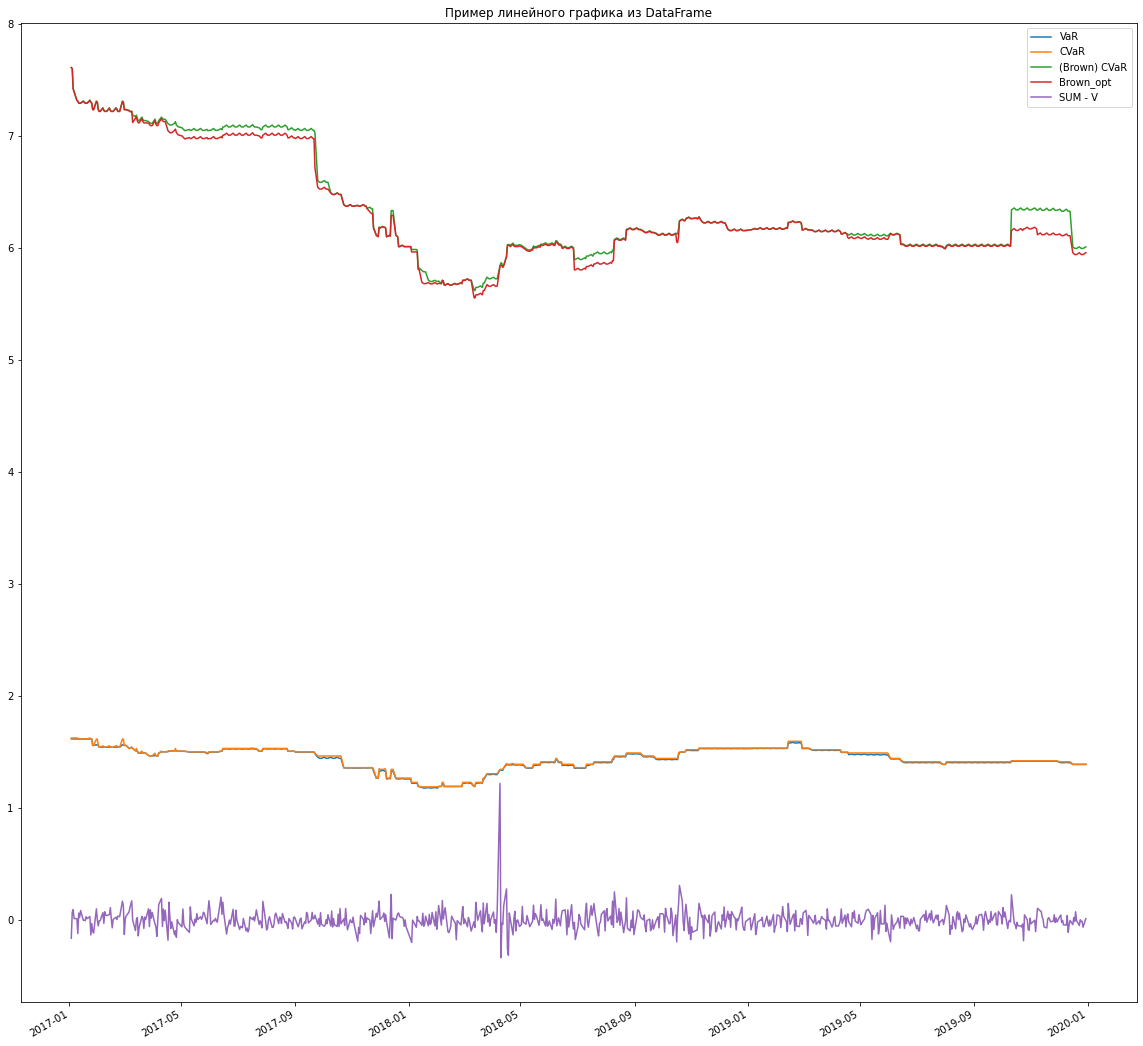

In [373]:
# Генерируем 4 случайных графика
print(df_new.plot(title='Пример линейного графика из DataFrame',figsize=(20,20)))

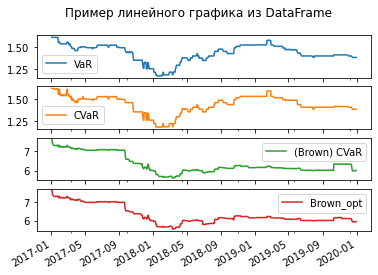

In [348]:
print(df_new.plot(title='Пример линейного графика из DataFrame', subplots=True))

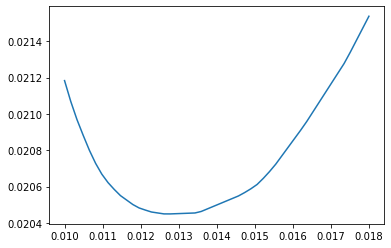

In [208]:
x = np.linspace(0.01, 0.018, 50)
y = np.array([v + np.mean(np.maximum(V-v, 0)) / cvar_alpha for v in x])

plt.plot(x,y)

In [209]:
np.mean(V[V >= var_empir(V, cvar_alpha)])

0.020207963857563356

In [288]:


for i in [0.02]:
    min_Brown_opt = minimize(Brown_opt, i, method='Nelder-Mead', tol=1e-8,options={'disp': True,}) 
    print(min_Brown_opt)
    min_q = min_Brown_opt.x 
    print(min_q, 'min_q')
    min_Brown_opt_value = min_Brown_opt.fun 
    print(min_Brown_opt_value, 'min_Brown_opt_value')

[0.02] q
0.030000000000000027 conf_level
[0.021] q
0.030000000000000027 conf_level
[0.022] q
0.030000000000000027 conf_level
[0.023] q
0.030000000000000027 conf_level
[0.025] q
0.030000000000000027 conf_level
[0.027] q
0.030000000000000027 conf_level
[0.027] q
0.030000000000000027 conf_level
[0.024] q
0.030000000000000027 conf_level
[0.026] q
0.030000000000000027 conf_level
[0.0245] q
0.030000000000000027 conf_level
[0.0255] q
0.030000000000000027 conf_level
[0.02525] q
0.030000000000000027 conf_level
[0.02475] q
0.030000000000000027 conf_level
[0.025125] q
0.030000000000000027 conf_level
[0.024875] q
0.030000000000000027 conf_level
[0.0250625] q
0.030000000000000027 conf_level
[0.025125] q
0.030000000000000027 conf_level
[0.02503125] q
0.030000000000000027 conf_level
[0.025] q
0.030000000000000027 conf_level
[0.02504687] q
0.030000000000000027 conf_level
[0.0250625] q
0.030000000000000027 conf_level
[0.02503906] q
0.030000000000000027 conf_level
[0.02503125] q
0.030000000000000027 con

# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler

In [ ]:
seed = 0

pca_start_dt = pd.datetime(2018,1,1)
pca_end_dt = pd.datetime(2019,1,1)

factor_start_dt = pca_end_dt
factor_end_dt = pd.datetime(2020,1,1)

In [ ]:
pca_df = return_df.loc[pca_start_dt:pca_end_dt] # train on 2018 data

pca = PCA(n_components=pca_df.shape[1])

pca.fit(pca_df)

In [ ]:
scaler = StandardScaler(with_std=False) # removes mean

scaler.fit(pca.transform(pca_df)) # train to factors

In [ ]:
factor_data = scaler.transform(pca.transform(return_df.loc[factor_start_dt:factor_end_dt])) # transform 2019 returns to factors and remove mean

factor_df = pd.DataFrame(factor_data, columns=['F{0:d}'.format(c) for c in range(return_df.shape[1])]) # transform from array to DataFrame

factor_df.head()

In [ ]:
sns.pairplot(data=factor_df, diag_kind='hist', plot_kws=dict(marker="o", s=15, linewidth=0))

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
standardizedData = StandardScaler().fit_transform(return_df)
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X = standardizedData)
C=principalComponents.T.dot(principalComponents)
cmatrix= pd.DataFrame(C, columns=['C{0:d}'.format(c) for c in range(return_df.shape[1])])
print(cmatrix)

In [ ]:
from scipy import linalg as LA
from numpy import array, dot, mean, std, empty, argsort
from numpy.linalg import eigh, solve
m, n = return_df.shape
return_df -= return_df.mean(axis=0)
R = np.cov(return_df, rowvar=False)
evals, evecs = LA.eigh(R)
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]
evecs = evecs[:, :9]
matrix= np.dot(evecs.T, return_df.T)
matrixC= np.dot(matrix, return_df)
matrixC_new= pd.DataFrame(matrixC, columns=['D{0:d}'.format(c) for c in range(return_df.shape[1])])
print(matrixC_new)

In [ ]:
m = return_df.T@return_df
print(m)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components =return_df.shape[1] )
XPCAreduced = pca.fit_transform(return_df.T)
NewC= pd.DataFrame(XPCAreduced, columns=['N{0:d}'.format(c) for c in range(return_df.shape[1])])
print(NewC)

In [ ]:
weights = np.random.random(9)
weights /= np.sum(weights)
print(weights)

In [ ]:
V=np.dot(m.T,weight)
Value = np.dot(factor_df, V).sum()
print(Value)

In [ ]:
A=np.dot(cmatrix.T,weight)
ValueA = np.dot(factor_df, A).sum()
print(ValueA)

In [ ]:
B=np.dot(matrixC_new.T,weight)
ValueB = str(math.fsum(np.dot(factor_df, B)))
print(ValueB)

In [ ]:
M=np.dot(NewC.T,weight)
ValueM = str(math.fsum(np.dot(factor_df, M)))
print(ValueM)

In [ ]:
meanReturns = return_df.mean()
covMatrix = return_df.cov()
def PortfolioPerformance(weights, meanReturns, covMatrix, Time):
    return_df = np.sum(meanReturns*weights)*Time
    std = np.sqrt(np.dot(weights.T, np.dot(covMatrix, weights)))*np.sqrt(Time)
    return return_df, std
weights = np.random.random(len(return_df.columns))
weights /= np.sum(weights)
return_df['portfolio']= return_df.dot(weights)
U= max(return_df['portfolio'])
err = np.std(return_df['portfolio'])
countR = np.count_nonzero(return_df, axis=1)
y=np.array(countR)
N=len(y[y>1])
alpha = np.array([1, 5, 10, 15, 20, 25, 30, 35, 40])
import math
Brown = 3*math.e**((alpha*-0.2*0.01)*(err/U)**2)*N
print(Brown)

In [ ]:
CVaR = 2*math.e**(-2*((err/U)**2)*N)
print(CVaR)

In [ ]:
factor_std = np.std(factor_df)
print(factor_std.sum())

In [ ]:
factor_max1= max(factor_df['F0'])
factor_max2= max(factor_df['F1'])
factor_max3= max(factor_df['F2'])
factor_max4= max(factor_df['F3'])
factor_max5= max(factor_df['F4'])
factor_max6= max(factor_df['F5'])
factor_max7= max(factor_df['F6'])
factor_max8= max(factor_df['F7'])
factor_max9= max(factor_df['F8'])
factor_max = max(factor_max1,factor_max2, factor_max3, factor_max4, factor_max5, factor_max6, factor_max7, factor_max8, factor_max9)
print(factor_max)

In [ ]:
countF = np.count_nonzero(factor_df, axis=1)
y=np.array(countF)
N_f=len(y[y>1])
print(N_f)

In [ ]:
Brown_f = 3*math.e**((5*-0.2*0.01)*(factor_std.sum()/factor_max)**2)*N_f
print(Brown_f)

In [ ]:
Val = np.dot(M, Brown_f).sum()
print(Val)